In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# create connection and getting tables

###### Importing Data From Mysql Database

In [3]:
host = 'localhost'
user = 'root'
password = 'jaisiyaram@909@'
database = 'sales'

try:
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    print("Connected to MySQL server successfully.")
except mysql.connector.Error as err:
    print(f"Error: {err}")
    connection = None
    
if connection:
    try:
        # List of table names
        table_names = ['customers', 'date', 'markets', 'products', 'transactions']  # Add more table names as needed

        # Dictionary to store DataFrames
        dataframes = {}

        for table_name in table_names:
            # Your SQL query
            query = f"SELECT * FROM {table_name};"

            # Create a cursor to execute SQL queries
            cursor = connection.cursor()

            # Execute the query
            cursor.execute(query)

            # Fetch all rows
            result = cursor.fetchall()

            # Create a DataFrame from the result
            columns = [desc[0] for desc in cursor.description]
            df = pd.DataFrame(result, columns=columns)

            # Store the DataFrame in the dictionary with table_name as key
            dataframes[table_name] = df

            # Close the cursor
            cursor.close()

        # Close the connection
        connection.close()

        # Access the DataFrames using table names as keys
        
        customers_df = dataframes['customers']
        date_df = dataframes['date']
        markets_df = dataframes['markets']
        products_df = dataframes['products']
        transaction_df = dataframes['transactions']

    except mysql.connector.Error as err:
        print(f"Error: {err}")    
        
        


Connected to MySQL server successfully.


In [4]:
# customer Analysis

###### Customer Analysis

In [5]:
customers_df.head()

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar
3,Cus004,Surface Stores,Brick & Mortar
4,Cus005,Premium Stores,Brick & Mortar


In [6]:
# join of customer analysis and transaction_df

In [7]:
transaction_df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.0,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR


In [8]:
transaction_df.groupby(['currency']).count()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount
currency,,,,,,
INR,279,279,279,279,279,279
INR\r,150000,150000,150000,150000,150000,150000
USD,2,2,2,2,2,2
USD\r,2,2,2,2,2,2


In [9]:
filtered_transaction_df = transaction_df[~transaction_df['currency'].isin(['INR', 'USD'])]

In [10]:
filtered_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150002 entries, 281 to 150282
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_code   150002 non-null  object 
 1   customer_code  150002 non-null  object 
 2   market_code    150002 non-null  object 
 3   order_date     150002 non-null  object 
 4   sales_qty      150002 non-null  int64  
 5   sales_amount   150002 non-null  float64
 6   currency       150002 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.2+ MB


In [11]:
filtered_transaction_df = filtered_transaction_df.query('sales_amount > 0')

In [12]:
filtered_transaction_df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
281,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR\r
283,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR\r
284,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR\r
285,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR\r
286,Prod003,Cus005,Mark004,2017-11-20,59,500.0,USD\r


In [13]:
filtered_transaction_df.loc[filtered_transaction_df['currency'] == 'USD\r', 'sales_amount']*=75


In [14]:
filtered_transaction_df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
281,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR\r
283,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR\r
284,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR\r
285,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR\r
286,Prod003,Cus005,Mark004,2017-11-20,59,37500.0,USD\r


In [15]:
# inner join of customers_df and filterd_transaction_df

In [16]:
customers_transaction_df = pd.merge(
                                customers_df,
                                filtered_transaction_df,
                                on= ['customer_code'],
                                how= 'inner')

In [17]:
customers_transaction_df.head()

,customer_code,custmer_name,customer_type,product_code,market_code,order_date,sales_qty,sales_amount,currency
0,Cus001,Surge Stores,Brick & Mortar,Prod001,Mark001,2017-10-10,100,41241.0,INR\r
1,Cus001,Surge Stores,Brick & Mortar,Prod013,Mark001,2017-10-10,240,143560.0,INR\r
2,Cus001,Surge Stores,Brick & Mortar,Prod016,Mark001,2018-06-28,187,115481.0,INR\r
3,Cus001,Surge Stores,Brick & Mortar,Prod020,Mark001,2017-10-10,140,153019.0,INR\r
4,Cus001,Surge Stores,Brick & Mortar,Prod020,Mark001,2017-10-25,47,51005.0,INR\r


In [18]:
ct_segment_analysis = customers_transaction_df.groupby('customer_type').agg(
                                total_transaction = ('sales_qty', 'count'),
                                total_sales_qty = ('sales_qty', 'sum'),
                                total_sales_amount = ('sales_amount', 'sum')).reset_index()

In [19]:
import matplotlib.pyplot as plt

In [20]:
ct_segment_analysis.set_index('customer_type', inplace=True)

In [21]:
# dataframe of customer and segment analysis

##### sales figure by customer type

In [22]:
ct_segment_analysis

,total_transaction,total_sales_qty,total_sales_amount
customer_type,,,
Brick & Mortar,96190,1854201,744525338.0
E-Commerce,52205,575081,240343625.0


In [23]:
# top 10 customer by sales_amount

In [24]:
top_10_customer_by_salesVolume = customers_transaction_df.groupby('custmer_name').agg(
                total_sales_amount = ('sales_amount', 'sum'))

In [25]:
top_10_customer_by_salesVolume = top_10_customer_by_salesVolume.sort_values(by='total_sales_amount', ascending=False).head(10)


##### Top 10 Customers by Total sales amount

In [26]:
top_10_customer_by_salesVolume

,total_sales_amount
custmer_name,
Electricalsara Stores,413333588.0
Electricalslytical,49644189.0
Excel Stores,49115620.0
Premium Stores,44962166.0
Nixon,43893083.0
Info Stores,35100033.0
Control,31771997.0
Surge Stores,28648916.0
Acclaimed Stores,21196727.0


In [27]:
# top 10 customers by salses frequency

In [28]:
top_10_customer_by_salesFrequency = customers_transaction_df.groupby('custmer_name').agg(
                total_transaction = ('sales_qty', 'count'))

In [29]:
top_10_customer_by_salesFrequency = top_10_customer_by_salesFrequency.sort_values(by= 'total_transaction',ascending=False).head(10)

##### Top 10 Customers by Sales Frequency

In [30]:
top_10_customer_by_salesFrequency

,total_transaction
custmer_name,
Premium Stores,19938
Nixon,17327
Electricalsara Stores,13819
Electricalsopedia Stores,11721
Excel Stores,9236
Power,6918
Info Stores,6017
Epic Stores,5413
Surge Stores,4971


In [31]:
# top 10 customer by sales qty

In [32]:
top_10_customer_by_salesQty = customers_transaction_df.groupby('custmer_name').agg(
                total_sales_qty = ('sales_qty', 'sum'))

In [33]:
top_10_customer_by_salesQty = top_10_customer_by_salesQty.sort_values(by= 'total_sales_qty', ascending=False).head(10)

##### Top 10 Customers by Total Sales Quantity

In [34]:
top_10_customer_by_salesQty

,total_sales_qty
custmer_name,
Electricalsara Stores,653823
Premium Stores,279093
Surge Stores,176201
Excel Stores,138520
Surface Stores,133919
Nixon,123356
Epic Stores,83857
Electricalslytical,79456
Electricalsopedia Stores,76608


In [35]:
customers_transaction_df.head()

,customer_code,custmer_name,customer_type,product_code,market_code,order_date,sales_qty,sales_amount,currency
0,Cus001,Surge Stores,Brick & Mortar,Prod001,Mark001,2017-10-10,100,41241.0,INR\r
1,Cus001,Surge Stores,Brick & Mortar,Prod013,Mark001,2017-10-10,240,143560.0,INR\r
2,Cus001,Surge Stores,Brick & Mortar,Prod016,Mark001,2018-06-28,187,115481.0,INR\r
3,Cus001,Surge Stores,Brick & Mortar,Prod020,Mark001,2017-10-10,140,153019.0,INR\r
4,Cus001,Surge Stores,Brick & Mortar,Prod020,Mark001,2017-10-25,47,51005.0,INR\r


In [36]:
customers_transaction_df['order_date'] = pd.to_datetime(customers_transaction_df['order_date'])

In [37]:
customers_transaction_df['month-year'] = customers_transaction_df['order_date'].dt.strftime('%Y-%m')

In [38]:
customers_transaction_df.head()

,customer_code,custmer_name,customer_type,product_code,market_code,order_date,sales_qty,sales_amount,currency,month-year
0,Cus001,Surge Stores,Brick & Mortar,Prod001,Mark001,2017-10-10,100,41241.0,INR\r,2017-10
1,Cus001,Surge Stores,Brick & Mortar,Prod013,Mark001,2017-10-10,240,143560.0,INR\r,2017-10
2,Cus001,Surge Stores,Brick & Mortar,Prod016,Mark001,2018-06-28,187,115481.0,INR\r,2018-06
3,Cus001,Surge Stores,Brick & Mortar,Prod020,Mark001,2017-10-10,140,153019.0,INR\r,2017-10
4,Cus001,Surge Stores,Brick & Mortar,Prod020,Mark001,2017-10-25,47,51005.0,INR\r,2017-10


In [39]:
customer_by_sales_VS_months = customers_transaction_df.pivot_table(values= 'sales_amount', index='month-year', columns = 'custmer_name', aggfunc='sum')

In [40]:
customer_by_sales_VS_months.head()

custmer_name,Acclaimed Stores,All-Out,Atlas Stores,Control,Electricalsara Stores,Electricalsbea Stores,Electricalslance Stores,Electricalslytical,Electricalsocity,Electricalsopedia Stores,...,Premium Stores,Propel,Relief,Sage,Sound,Surface Stores,Surge Stores,Synthetic,Unity Stores,Zone
month-year,,,,,,,,,,,,,,,,,,,,,
2017-10,534789.0,169107.0,783238.0,717979.0,8598046.0,NaN,26786.0,1251944.0,259996.0,266126.0,...,1517691.0,104969.0,88704.0,3717.0,57148.0,309458.0,1436632.0,342110.0,186625.0,270449.0
2017-11,608216.0,367539.0,532904.0,943439.0,14465189.0,3097.0,21395.0,1339803.0,495064.0,522867.0,...,2365541.0,135358.0,126494.0,323889.0,349069.0,495871.0,768655.0,494672.0,245204.0,46515.0
2017-12,558922.0,343831.0,443588.0,920308.0,13035184.0,9270.0,39312.0,3544056.0,297443.0,365100.0,...,1409930.0,139948.0,105004.0,13968.0,177249.0,565402.0,776930.0,402394.0,429606.0,105855.0
2018-01,1321647.0,228586.0,444040.0,867809.0,19402545.0,7251.0,78993.0,1859952.0,1152424.0,349447.0,...,1586974.0,170461.0,129212.0,684597.0,196107.0,439034.0,2208930.0,342700.0,438801.0,276184.0
2018-02,1699440.0,192335.0,368039.0,1112490.0,11448394.0,16995.0,42345.0,2311857.0,1403818.0,321057.0,...,1542461.0,117536.0,239916.0,346278.0,170021.0,411375.0,1320091.0,354482.0,587310.0,94501.0


In [41]:
top3 = customer_by_sales_VS_months.sum().nlargest(3).index
top3

Index(['Electricalsara Stores', 'Electricalslytical', 'Excel Stores'], dtype='object', name='custmer_name')

In [42]:
top3_customer_by_sales_VS_months = customer_by_sales_VS_months[top3]

##### Top 3 customers sales performance over time

In [43]:
top3_customer_by_sales_VS_months.head()

custmer_name,Electricalsara Stores,Electricalslytical,Excel Stores
month-year,,,
2017-10,8598046.0,1251944.0,2072137.0
2017-11,14465189.0,1339803.0,1501851.0
2017-12,13035184.0,3544056.0,1026073.0
2018-01,19402545.0,1859952.0,1271548.0
2018-02,11448394.0,2311857.0,926129.0


### Market Aanalysis

In [44]:
# market analysis

In [45]:
markets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   markets_code  17 non-null     object
 1   markets_name  17 non-null     object
 2   zone          17 non-null     object
dtypes: object(3)
memory usage: 536.0+ bytes


In [46]:
markets_df.head()

,markets_code,markets_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North
3,Mark004,Delhi NCR,North
4,Mark005,Kanpur,North


In [47]:
new_column_name = {'markets_code':'market_code'}
markets_df = markets_df.rename(columns=new_column_name)

In [48]:
transaction_df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.0,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR


In [49]:
# merging market and filtered transaction table

In [50]:
market_transaction_df = pd.merge(markets_df, filtered_transaction_df, on= 'market_code', how='inner')

In [51]:
market_transaction_df.head()

,market_code,markets_name,zone,product_code,customer_code,order_date,sales_qty,sales_amount,currency
0,Mark001,Chennai,South,Prod001,Cus001,2017-10-10,100,41241.0,INR\r
1,Mark001,Chennai,South,Prod013,Cus001,2017-10-10,240,143560.0,INR\r
2,Mark001,Chennai,South,Prod016,Cus001,2018-06-28,187,115481.0,INR\r
3,Mark001,Chennai,South,Prod020,Cus001,2017-10-10,140,153019.0,INR\r
4,Mark001,Chennai,South,Prod020,Cus001,2017-10-25,47,51005.0,INR\r


In [52]:
# top markets

In [53]:
top_markets_by_sales = market_transaction_df.groupby('markets_name').agg(
                total_transaction = ('sales_qty', 'count'),
                total_sales_qty = ('sales_qty', 'sum'),
                total_sales_amount = ('sales_amount', 'sum')).sort_values(by='total_sales_amount', ascending=False).head(10)

##### Top 10 Markets Sales Figure

In [54]:
top_markets_by_sales.head()

,total_transaction,total_sales_qty,total_sales_amount
markets_name,,,
Delhi NCR,44219,988294,519569771.0
Mumbai,11321,383643,150084801.0
Ahmedabad,20035,206925,132307441.0
Bhopal,13322,112740,58609861.0
Nagpur,47670,262094,55026321.0


In [55]:
# top market zone

In [56]:
top_zone_by_sales = market_transaction_df.groupby('zone').agg(
                total_transaction = ('sales_qty', 'count'),
                total_sales_qty = ('sales_qty', 'sum'),
                total_sales_amount = ('sales_amount', 'sum')).sort_values(by='total_sales_amount', ascending=False)

##### Sales Figure by Market Zones

In [57]:
top_zone_by_sales

,total_transaction,total_sales_qty,total_sales_amount
zone,,,
North,67974,1271557,675588017.0
Central,72313,758477,263720983.0
South,8108,399248,45559963.0


In [58]:
# top 3 markets vs time analysis

In [59]:
market_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148395 entries, 0 to 148394
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   market_code    148395 non-null  object 
 1   markets_name   148395 non-null  object 
 2   zone           148395 non-null  object 
 3   product_code   148395 non-null  object 
 4   customer_code  148395 non-null  object 
 5   order_date     148395 non-null  object 
 6   sales_qty      148395 non-null  int64  
 7   sales_amount   148395 non-null  float64
 8   currency       148395 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 11.3+ MB


In [60]:
market_transaction_df['order_date'] = pd.to_datetime(market_transaction_df['order_date'])

In [61]:
market_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148395 entries, 0 to 148394
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   market_code    148395 non-null  object        
 1   markets_name   148395 non-null  object        
 2   zone           148395 non-null  object        
 3   product_code   148395 non-null  object        
 4   customer_code  148395 non-null  object        
 5   order_date     148395 non-null  datetime64[ns]
 6   sales_qty      148395 non-null  int64         
 7   sales_amount   148395 non-null  float64       
 8   currency       148395 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 11.3+ MB


In [62]:
market_transaction_df['month-year'] = market_transaction_df['order_date'].dt.strftime('%Y-%m')

In [63]:
market_transaction_df.head()

,market_code,markets_name,zone,product_code,customer_code,order_date,sales_qty,sales_amount,currency,month-year
0,Mark001,Chennai,South,Prod001,Cus001,2017-10-10,100,41241.0,INR\r,2017-10
1,Mark001,Chennai,South,Prod013,Cus001,2017-10-10,240,143560.0,INR\r,2017-10
2,Mark001,Chennai,South,Prod016,Cus001,2018-06-28,187,115481.0,INR\r,2018-06
3,Mark001,Chennai,South,Prod020,Cus001,2017-10-10,140,153019.0,INR\r,2017-10
4,Mark001,Chennai,South,Prod020,Cus001,2017-10-25,47,51005.0,INR\r,2017-10


In [64]:
market_transaction_sales_vs_month = market_transaction_df.pivot_table(values='sales_amount', index='month-year', columns='markets_name', aggfunc='sum')

In [65]:
market_transaction_sales_vs_month.head()

markets_name,Ahmedabad,Bengaluru,Bhopal,Bhubaneshwar,Chennai,Delhi NCR,Hyderabad,Kanpur,Kochi,Lucknow,Mumbai,Nagpur,Patna,Surat
month-year,,,,,,,,,,,,,,
2017-10,3509040.0,NaN,1685300.0,27699.0,877901.0,13032103.0,352484.0,508783.0,764470.0,42436.0,4006429.0,971566.0,304598.0,4208.0
2017-11,4312021.0,NaN,1642678.0,41506.0,222497.0,20249541.0,276660.0,680176.0,728341.0,147287.0,4907397.0,1514752.0,316490.0,15114.0
2017-12,3621690.0,NaN,2238909.0,27402.0,385631.0,16276130.0,268920.0,517280.0,761110.0,11463.0,5960620.0,1492982.0,196620.0,37919.0
2018-01,4451444.0,NaN,2420886.0,74435.0,1918843.0,23807347.0,183697.0,1202488.0,499326.0,17769.0,5463671.0,2012976.0,358857.0,108753.0
2018-02,4183382.0,NaN,2624861.0,34281.0,1043951.0,16407469.0,180579.0,223094.0,520529.0,311354.0,8052972.0,1279993.0,278630.0,102871.0


In [66]:
# getting top 3 markets by sales voulum

In [67]:
top3_markets = market_transaction_sales_vs_month.sum().nlargest(3).index
top3_markets

Index(['Delhi NCR', 'Mumbai', 'Ahmedabad'], dtype='object', name='markets_name')

In [68]:
market_transaction_sales_vs_month = market_transaction_sales_vs_month[top3_markets]

##### Top 3 Market Sales performance over time

In [69]:
market_transaction_sales_vs_month.head()

markets_name,Delhi NCR,Mumbai,Ahmedabad
month-year,,,
2017-10,13032103.0,4006429.0,3509040.0
2017-11,20249541.0,4907397.0,4312021.0
2017-12,16276130.0,5960620.0,3621690.0
2018-01,23807347.0,5463671.0,4451444.0
2018-02,16407469.0,8052972.0,4183382.0


### Product Analysis

In [70]:
# product_analysis

In [71]:
products_df.head()

,product_code,product_type
0,Prod001,Own Brand\r
1,Prod002,Own Brand\r
2,Prod003,Own Brand\r
3,Prod004,Own Brand\r
4,Prod005,Own Brand\r


In [72]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  279 non-null    object
 1   product_type  279 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [73]:
products_df['product_type'].unique()

array(['Own Brand\r', 'Distribution\r'], dtype=object)

In [74]:
filtered_transaction_df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
281,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR\r
283,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR\r
284,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR\r
285,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR\r
286,Prod003,Cus005,Mark004,2017-11-20,59,37500.0,USD\r


In [75]:
# merge filtered_tansaction and products table

In [76]:
product_transaction_df = pd.merge(products_df,filtered_transaction_df,on='product_code',how='inner')

In [77]:
product_transaction_df.head()

,product_code,product_type,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Own Brand\r,Cus001,Mark001,2017-10-10,100,41241.0,INR\r
1,Prod002,Own Brand\r,Cus003,Mark003,2018-04-06,1,875.0,INR\r
2,Prod002,Own Brand\r,Cus003,Mark003,2018-04-11,1,583.0,INR\r
3,Prod002,Own Brand\r,Cus004,Mark003,2018-06-18,6,7176.0,INR\r
4,Prod003,Own Brand\r,Cus005,Mark004,2017-11-20,59,37500.0,USD\r


In [78]:
grouped_by_product_code = product_transaction_df.groupby('product_code').agg(
                        total_transaction = ('sales_qty', 'count'),
                        total_sales_qty = ('sales_qty', 'sum'),
                        total_sales_amount = ('sales_amount', 'sum')).sort_values(by='total_sales_amount', ascending=False).head(10)

In [79]:
grouped_by_product_code.head()

,total_transaction,total_sales_qty,total_sales_amount
product_code,,,
Prod040,716,16116,23581969.0
Prod159,1066,18425,17660106.0
Prod065,3952,64077,16259345.0
Prod018,805,7081,15597920.0
Prod053,3765,62147,15135392.0


In [80]:
grouped_by_product_type = product_transaction_df.groupby('product_type').agg(
                        total_transaction = ('sales_qty', 'count'),
                        total_sales_qty = ('sales_qty', 'sum'),
                        total_sales_amount = ('sales_amount', 'sum')).sort_values(by='total_sales_amount', ascending=False)

#### Sales Figure by Product type

In [81]:
grouped_by_product_type

,total_transaction,total_sales_qty,total_sales_amount
product_type,,,
Own Brand\r,60217,1513287,369868148.0
Distribution\r,33579,496576,146039576.0


In [82]:
least_performing_products = grouped_by_product_code.sort_values(by='total_sales_amount', ascending=True).head()

#### Least Performing Products

In [83]:
least_performing_products

,total_transaction,total_sales_qty,total_sales_amount
product_code,,,
Prod049,728,9661,11048968.0
Prod239,1036,170458,11090065.0
Prod102,1391,11752,12070353.0
Prod060,1331,28878,12888932.0
Prod090,713,277959,13418817.0


In [84]:
product_transaction_df['order_date'] = pd.to_datetime(product_transaction_df['order_date'])

In [85]:
product_transaction_df['month-year'] = product_transaction_df['order_date'].dt.strftime('%Y-%m')

In [86]:
product_transaction_vs_month = product_transaction_df.pivot_table(values='sales_amount', index='month-year', columns='product_code', aggfunc='sum')

In [87]:
top3_product = product_transaction_vs_month.sum().nlargest(3).index
top3_product

Index(['Prod040', 'Prod159', 'Prod065'], dtype='object', name='product_code')

In [88]:
product_transaction_vs_month = product_transaction_vs_month[top3_product]

In [89]:
product_transaction_vs_month.fillna(0, inplace=True)

#### Top 3 Products sales Performance over time

In [90]:
product_transaction_vs_month.head()

product_code,Prod040,Prod159,Prod065
month-year,,,
2017-10,0.0,0.0,104389.0
2017-11,0.0,0.0,184463.0
2017-12,0.0,190.0,334567.0
2018-01,4628923.0,3676301.0,322483.0
2018-02,840450.0,1380759.0,310208.0


In [91]:
# transaction_analysis

#### Transaction Analysis 

In [92]:
filtered_transaction_df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
281,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR\r
283,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR\r
284,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR\r
285,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR\r
286,Prod003,Cus005,Mark004,2017-11-20,59,37500.0,USD\r


In [93]:
filtered_transaction_df['order_date'] = pd.to_datetime(filtered_transaction_df['order_date'])

In [94]:
filtered_transaction_df['month-year'] = filtered_transaction_df['order_date'].dt.strftime('%Y-%m')

In [95]:
filtered_transaction_df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,month-year
281,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR\r,2017-10
283,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR\r,2018-04
284,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR\r,2018-04
285,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR\r,2018-06
286,Prod003,Cus005,Mark004,2017-11-20,59,37500.0,USD\r,2017-11


In [96]:
transaction_analysis = filtered_transaction_df.groupby('month-year').agg(
                    total_transaction = ('sales_qty', 'count'),
                    total_sales_amount = ('sales_amount', 'sum'))

In [97]:
transaction_analysis.head()

,total_transaction,total_sales_amount
month-year,,
2017-10,4222,26087017.0
2017-11,5421,35054460.0
2017-12,4914,31796676.0
2018-01,5238,42520492.0
2018-02,4931,35243966.0


### Visual Representation of Report

In [98]:
# representation of data

In [99]:
# customer analysis

In [100]:
ct_segment_analysis

,total_transaction,total_sales_qty,total_sales_amount
customer_type,,,
Brick & Mortar,96190,1854201,744525338.0
E-Commerce,52205,575081,240343625.0


In [101]:
# craeting gridSpace

In [102]:
# fig = plt.figure(figsize=(10,10))
# gs = gridspec.GridSpec(ncols = 4, nrows = 8, wspace = 0.5, hspace= 1)

# ax1 = fig.add_subplot(gs[0:4, 0:2])
# ax2 = fig.add_subplot(gs[0:4, 2:4])
# ax3 = fig.add_subplot(gs[4:, :])

In [103]:
ct_segment_analysis

,total_transaction,total_sales_qty,total_sales_amount
customer_type,,,
Brick & Mortar,96190,1854201,744525338.0
E-Commerce,52205,575081,240343625.0


In [104]:
top_10_customer_by_salesVolume

,total_sales_amount
custmer_name,
Electricalsara Stores,413333588.0
Electricalslytical,49644189.0
Excel Stores,49115620.0
Premium Stores,44962166.0
Nixon,43893083.0
Info Stores,35100033.0
Control,31771997.0
Surge Stores,28648916.0
Acclaimed Stores,21196727.0


In [105]:
top3_customer_by_sales_VS_months.head()

custmer_name,Electricalsara Stores,Electricalslytical,Excel Stores
month-year,,,
2017-10,8598046.0,1251944.0,2072137.0
2017-11,14465189.0,1339803.0,1501851.0
2017-12,13035184.0,3544056.0,1026073.0
2018-01,19402545.0,1859952.0,1271548.0
2018-02,11448394.0,2311857.0,926129.0


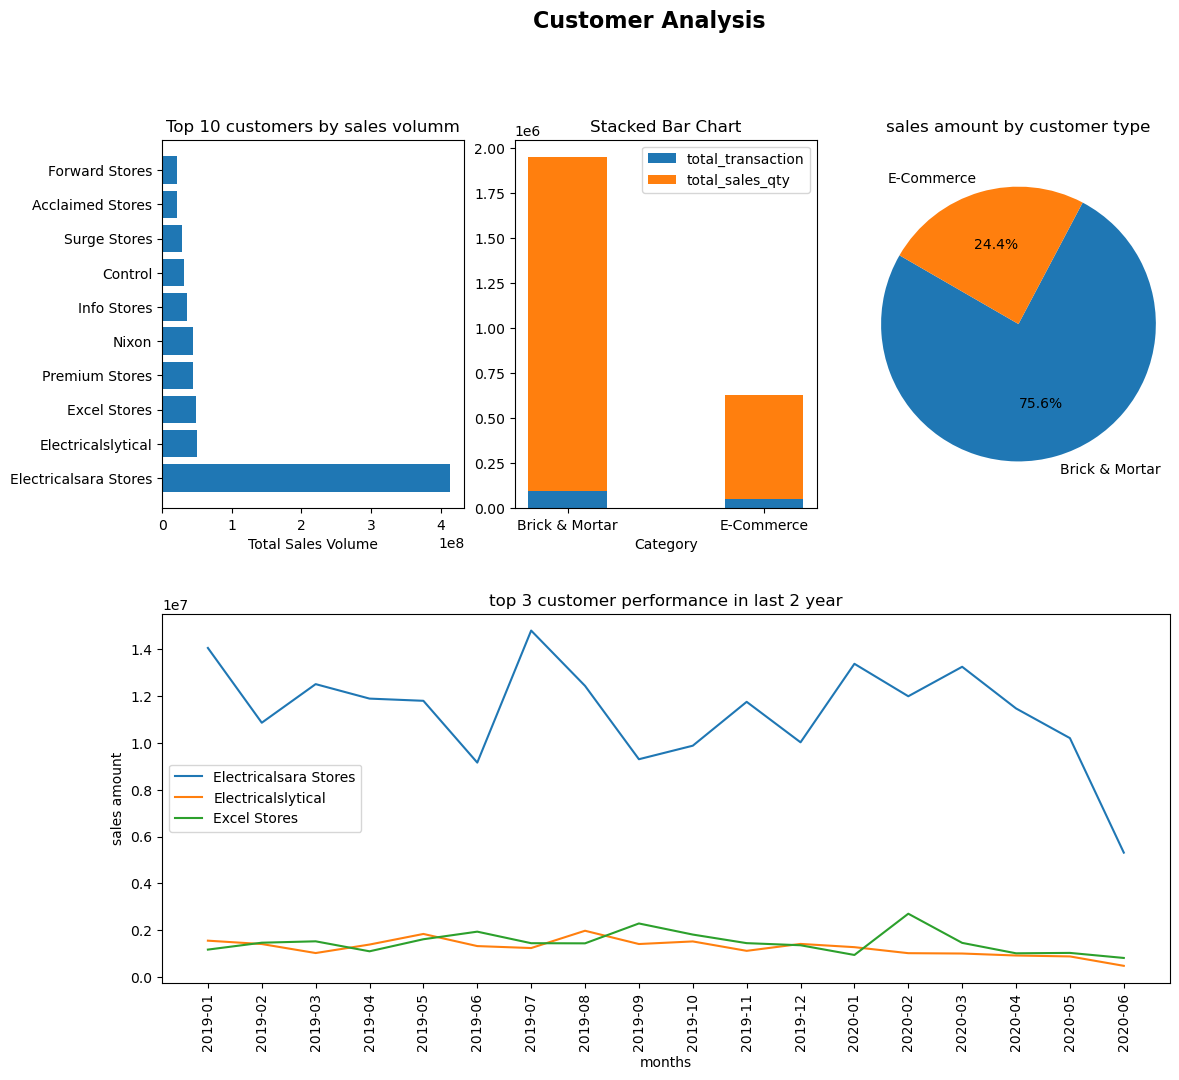

In [106]:
fig = plt.figure(figsize = (13,13))
gs = gridspec.GridSpec(ncols = 6, nrows = 7, wspace = 0.4, hspace =2)

ax1 = fig.add_subplot(gs[0:3, 0:2])
ax2 = fig.add_subplot(gs[0:3, 2:4])
ax3 = fig.add_subplot(gs[0:3, 4:])

ax4 = fig.add_subplot(gs[3:6, :])

# Step 4: Plot the pie chart using ax.pie()
ax3.pie(ct_segment_analysis['total_sales_amount'], labels=ct_segment_analysis.index, autopct='%1.1f%%', startangle=150)

# Add a title to the pie chart
ax3.set_title('sales amount by customer type')

# Set aspect ratio to be equal to make the pie circular.
ax3.axis('equal')
# ax3.text(fontsize =12)


# bar chart of top 10 customers
ax1.barh(top_10_customer_by_salesVolume.index, top_10_customer_by_salesVolume['total_sales_amount'])

# Add labels and title
ax1.set_xlabel('Total Sales Volume')
# ax1.set_ylabel('Customer')
ax1.set_title('Top 10 customers by sales volumm')

# stacked bar chart of total transaction and total sales qty

# Plot the stacked bar chart using ax.bar()
bar_width = 0.4
bar1 = ax2.bar(ct_segment_analysis.index, ct_segment_analysis['total_transaction'], width=bar_width, label='total_transaction')
bar2 = ax2.bar(ct_segment_analysis.index, ct_segment_analysis['total_sales_qty'], width=bar_width, bottom=ct_segment_analysis['total_transaction'], label='total_sales_qty')

# Add labels and title
ax2.set_xlabel('Category')
# ax2.set_ylabel('Value')
ax2.set_title('Stacked Bar Chart')
ax2.legend()

# time series of top 3 customer in last 2 years
top3_customer_by_sales_VS_last_2_year = top3_customer_by_sales_VS_months.tail(18)

# Step 4: Plot the line plots using ax.plot()
ax4.plot(top3_customer_by_sales_VS_last_2_year.index, top3_customer_by_sales_VS_last_2_year['Electricalsara Stores'], label='Electricalsara Stores')
ax4.plot(top3_customer_by_sales_VS_last_2_year.index, top3_customer_by_sales_VS_last_2_year['Electricalslytical'], label='Electricalslytical')
ax4.plot(top3_customer_by_sales_VS_last_2_year.index, top3_customer_by_sales_VS_last_2_year['Excel Stores'], label='Excel Stores')

# Add labels and title
ax4.set_xlabel('months')
ax4.set_ylabel('sales amount')
ax4.set_title('top 3 customer performance in last 2 year')
ax4.legend()

# Tilt x-labels by 45 degrees
ax4.tick_params(axis='x', rotation=90)

# Add a title to the figure
fig.suptitle('Customer Analysis', fontsize=16, fontweight='bold')

# Show the plot
plt.show()



In [107]:
# market analysis representation

In [108]:
top_markets_by_sales.head()

,total_transaction,total_sales_qty,total_sales_amount
markets_name,,,
Delhi NCR,44219,988294,519569771.0
Mumbai,11321,383643,150084801.0
Ahmedabad,20035,206925,132307441.0
Bhopal,13322,112740,58609861.0
Nagpur,47670,262094,55026321.0


In [109]:
top_zone_by_sales

,total_transaction,total_sales_qty,total_sales_amount
zone,,,
North,67974,1271557,675588017.0
Central,72313,758477,263720983.0
South,8108,399248,45559963.0


In [110]:
market_transaction_sales_vs_month.head()

markets_name,Delhi NCR,Mumbai,Ahmedabad
month-year,,,
2017-10,13032103.0,4006429.0,3509040.0
2017-11,20249541.0,4907397.0,4312021.0
2017-12,16276130.0,5960620.0,3621690.0
2018-01,23807347.0,5463671.0,4451444.0
2018-02,16407469.0,8052972.0,4183382.0


In [111]:
# visual representation

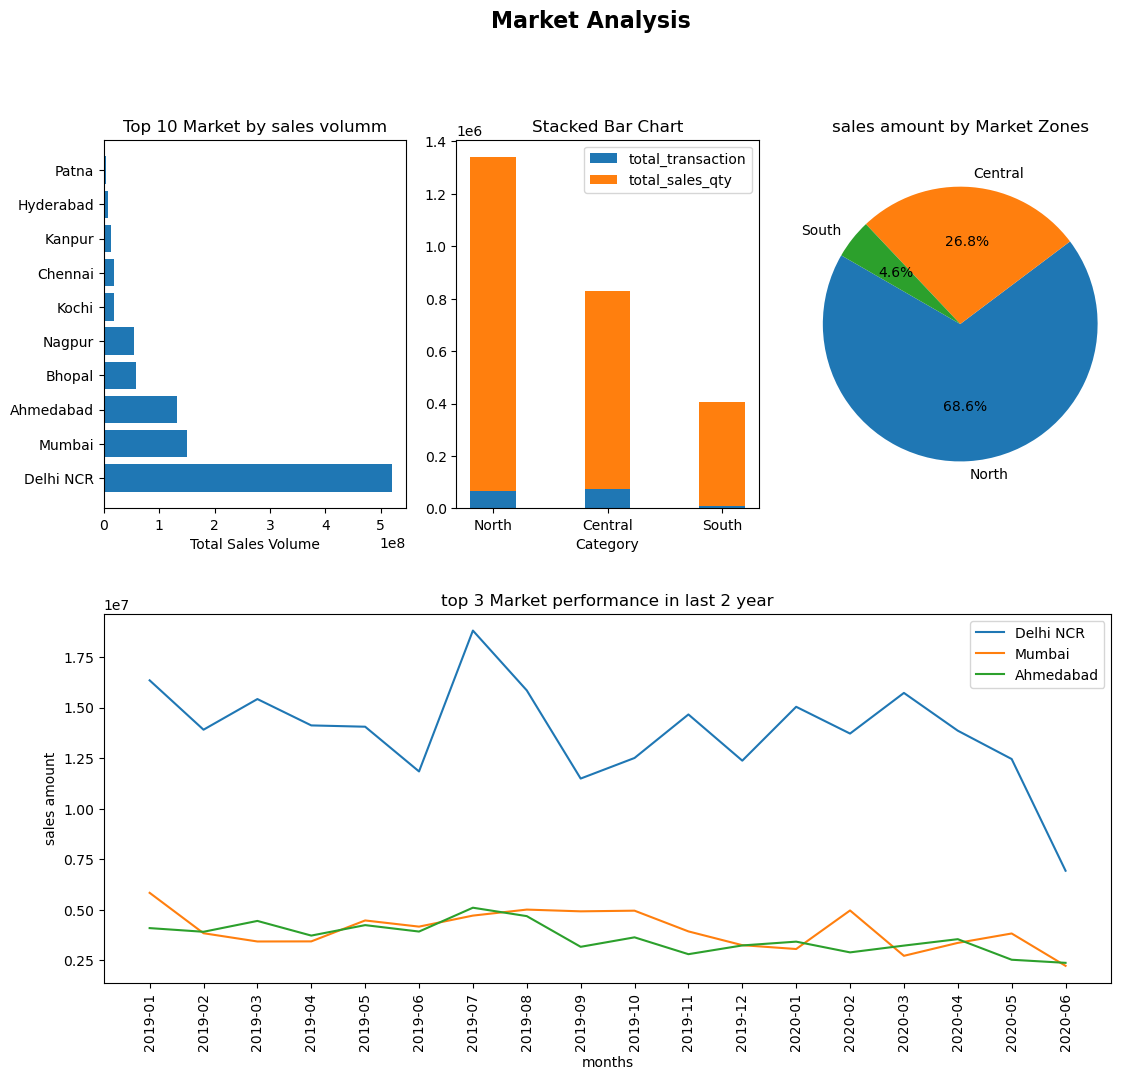

In [112]:
fig = plt.figure(figsize = (13,13))
gs = gridspec.GridSpec(ncols = 6, nrows = 7, wspace = 0.4, hspace =2)

ax1 = fig.add_subplot(gs[0:3, 0:2])
ax2 = fig.add_subplot(gs[0:3, 2:4])
ax3 = fig.add_subplot(gs[0:3, 4:])

ax4 = fig.add_subplot(gs[3:6, :])

# Step 4: Plot the pie chart using ax.pie()
ax3.pie(top_zone_by_sales['total_sales_amount'], labels=top_zone_by_sales.index, autopct='%1.1f%%', startangle=150)

# Add a title to the pie chart
ax3.set_title('sales amount by Market Zones')

# Set aspect ratio to be equal to make the pie circular.
ax3.axis('equal')
# ax3.text(fontsize =12)

# bar chart of top 10 customers
ax1.barh(top_markets_by_sales.index, top_markets_by_sales['total_sales_amount'])

# Add labels and title
ax1.set_xlabel('Total Sales Volume')
# ax1.set_ylabel('Customer')
ax1.set_title('Top 10 Market by sales volumm')


# Plot the stacked bar chart using ax.bar()
bar_width = 0.4
bar1 = ax2.bar(top_zone_by_sales.index, top_zone_by_sales['total_transaction'], width=bar_width, label='total_transaction')
bar2 = ax2.bar(top_zone_by_sales.index, top_zone_by_sales['total_sales_qty'], width=bar_width, bottom=top_zone_by_sales['total_transaction'], label='total_sales_qty')

# Add labels and title
ax2.set_xlabel('Category')
# ax2.set_ylabel('Value')
ax2.set_title('Stacked Bar Chart')
ax2.legend()

# time series of top 3 customer in last 2 years
market_transaction_sales_vs_month_last_2_year = market_transaction_sales_vs_month.tail(18)

# Step 4: Plot the line plots using ax.plot()
ax4.plot(market_transaction_sales_vs_month_last_2_year.index, market_transaction_sales_vs_month_last_2_year['Delhi NCR'], label='Delhi NCR')
ax4.plot(market_transaction_sales_vs_month_last_2_year.index, market_transaction_sales_vs_month_last_2_year['Mumbai'], label='Mumbai')
ax4.plot(market_transaction_sales_vs_month_last_2_year.index, market_transaction_sales_vs_month_last_2_year['Ahmedabad'], label='Ahmedabad')

# Add labels and title
ax4.set_xlabel('months')
ax4.set_ylabel('sales amount')
ax4.set_title('top 3 Market performance in last 2 year')
ax4.legend()

# Tilt x-labels by 45 degrees
ax4.tick_params(axis='x', rotation=90)

# Add a title to the figure
fig.suptitle('Market Analysis', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

In [113]:
# product analysis representation

In [114]:
grouped_by_product_code.head()

,total_transaction,total_sales_qty,total_sales_amount
product_code,,,
Prod040,716,16116,23581969.0
Prod159,1066,18425,17660106.0
Prod065,3952,64077,16259345.0
Prod018,805,7081,15597920.0
Prod053,3765,62147,15135392.0


In [115]:
grouped_by_product_type

,total_transaction,total_sales_qty,total_sales_amount
product_type,,,
Own Brand\r,60217,1513287,369868148.0
Distribution\r,33579,496576,146039576.0


In [116]:
least_performing_products

,total_transaction,total_sales_qty,total_sales_amount
product_code,,,
Prod049,728,9661,11048968.0
Prod239,1036,170458,11090065.0
Prod102,1391,11752,12070353.0
Prod060,1331,28878,12888932.0
Prod090,713,277959,13418817.0


In [117]:
product_transaction_vs_month.head()

product_code,Prod040,Prod159,Prod065
month-year,,,
2017-10,0.0,0.0,104389.0
2017-11,0.0,0.0,184463.0
2017-12,0.0,190.0,334567.0
2018-01,4628923.0,3676301.0,322483.0
2018-02,840450.0,1380759.0,310208.0


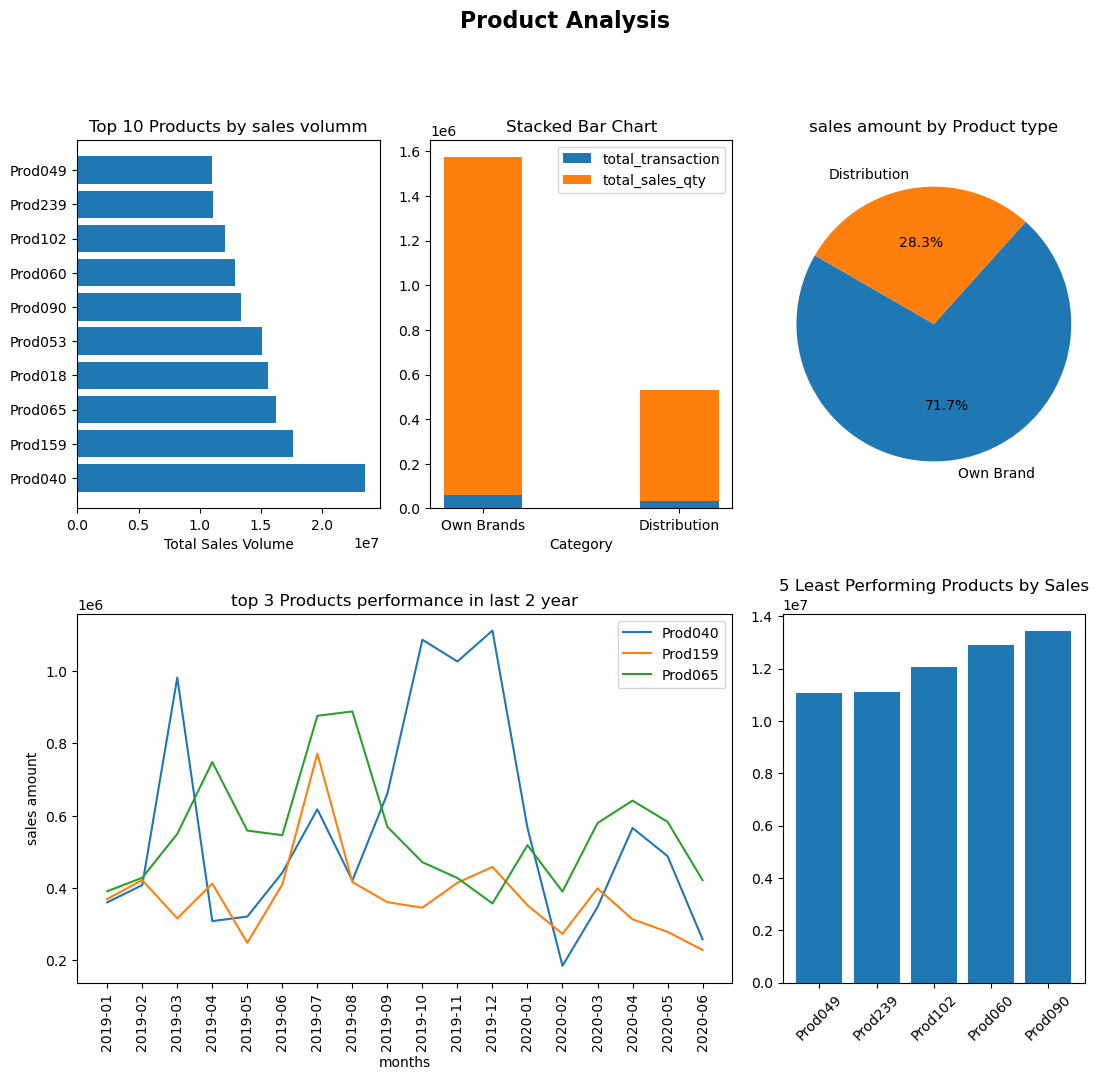

In [118]:
fig = plt.figure(figsize = (13,13))
gs = gridspec.GridSpec(ncols = 6, nrows = 7, wspace = 0.4, hspace =2)

ax1 = fig.add_subplot(gs[0:3, 0:2])
ax2 = fig.add_subplot(gs[0:3, 2:4])
ax3 = fig.add_subplot(gs[0:3, 4:])

ax4 = fig.add_subplot(gs[3:6, :4])
ax5 = fig.add_subplot(gs[3:6, 4:])

# Step 4: Plot the pie chart using ax.pie()
ax3.pie(grouped_by_product_type['total_sales_amount'], labels=['Own Brand', 'Distribution'], autopct='%1.1f%%', startangle=150)

# Add a title to the pie chart
ax3.set_title('sales amount by Product type')

# Set aspect ratio to be equal to make the pie circular.
ax3.axis('equal')
# ax3.text(fontsize =12)

# bar chart of top 10 customers
ax1.barh(grouped_by_product_code.index, grouped_by_product_code['total_sales_amount'])

# Add labels and title
ax1.set_xlabel('Total Sales Volume')
# ax1.set_ylabel('Customer')
ax1.set_title('Top 10 Products by sales volumm')


# Plot the stacked bar chart using ax.bar()
bar_width = 0.4
bar1 = ax2.bar(['Own Brands', 'Distribution'], grouped_by_product_type['total_transaction'], width=bar_width, label='total_transaction')
bar2 = ax2.bar(['Own Brands', 'Distribution'], grouped_by_product_type['total_sales_qty'], width=bar_width, bottom=grouped_by_product_type['total_transaction'], label='total_sales_qty')

# Add labels and title
ax2.set_xlabel('Category')
# ax2.set_ylabel('Value')
ax2.set_title('Stacked Bar Chart')
ax2.legend()

# time series of top 3 customer in last 2 years
product_transaction_vs_month_last_2_year = product_transaction_vs_month.tail(18)

# Step 4: Plot the line plots using ax.plot()
ax4.plot(product_transaction_vs_month_last_2_year.index, product_transaction_vs_month_last_2_year['Prod040'], label='Prod040')
ax4.plot(product_transaction_vs_month_last_2_year.index, product_transaction_vs_month_last_2_year['Prod159'], label='Prod159')
ax4.plot(product_transaction_vs_month_last_2_year.index, product_transaction_vs_month_last_2_year['Prod065'], label='Prod065')

# Add labels and title
ax4.set_xlabel('months')
ax4.set_ylabel('sales amount')
ax4.set_title('top 3 Products performance in last 2 year')
ax4.legend()

# Tilt x-labels by 45 degrees
ax4.tick_params(axis='x', rotation=90)

ax5.bar(least_performing_products.index, least_performing_products['total_sales_amount'])

# Set labels and title
# ax5.set_xlabel('')
# ax5.set_ylabel('Total Sales')
ax5.set_title('5 Least Performing Products by Sales')
ax5.tick_params(axis='x', rotation=45)

# Add a title to the figure
fig.suptitle('Product Analysis', fontsize=16, fontweight='bold')

# Show the plot
plt.show()